# Modèle de Black-Scholes et évaluation d'options

In [64]:
# importe les bibliothèques dont on aura besoin
# on utilise les alias canoniques
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps

## 1 _ Modèle de Black Scholes

**Question T1)** Si on a $ X \sim \mathcal{N}(\mu, \sigma^2), \quad Y = \exp(X). $ et que l'on souhaite trouver la loi de Y, on procède de la manière suivante :

Méthode de la fonction muette, on prend h une fonction continue bornée et on calcule :

$$
\mathbb{E}(h(Y))= \int_{-\infty}^{+\infty}{h(\exp(X))}\frac{1}{\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}dx
$$

On fait le changement de variable $ y = \exp(x)$ alors $dy = \exp(x)dx$ soit $\frac{dy}{y}=dx$.

On obtient : 

$$
\mathbb{E}(h(Y))= \int_{0}^{+\infty}{h(y)}\frac{1}{y\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(\log(y)-\mu)^2}{2\sigma^2}\right)}dy
$$

$$
\mathbb{E}(h(Y))= \int_{-\infty}^{+\infty}{h(y)}\frac{1}{y\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(\log(y)-\mu)^2}{2\sigma^2}\right)}\mathbf{1}_{\{y > 0\}}dy
$$

Ainsi $Y$ admet pour densité de probabilité la fonction 

$$
f(y) = \frac{1}{y\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(\log(y)-\mu)^2}{2\sigma^2}\right)}\mathbf{1}_{\{y > 0\}}
$$

Déduisons de ces calculs la densité de $S_t$ : 

Pour commencer $B_t \sim \mathcal{N}(0,t)$ car $B_t-B_0 \sim \mathcal{N}(0,t-0)$ et $B_0=0 $.

Ainsi $ \left(r-\frac{\sigma^2}{2}\right)t + \log(x) + \sigma B_t \sim \mathcal{N}\left(\left(r-\frac{\sigma^2}{2}\right)t + \log(x) ,t\sigma^2\right)$

Donc, d'après la première partie de la question, la variable aléatoire $S_t = \exp\left(\left(r-\frac{\sigma^2}{2}\right)t + \log(x) + \sigma B_t \right)$ admet une densité que nous savons exprimer. 

Enfin, la densité de $S_t$ s'ecrit :

$$
f(y) = \frac{1}{y\sqrt{2\pi{t}\sigma^2}}{\exp\left(-\frac{(\log(y)-\left(\left(r-\frac{\sigma^2}{2}\right)t + \log(x) \right))^2}{2t\sigma^2}\right)}\mathbf{1}_{\{y > 0\}}
$$

**Analyse du résultat** : il s'agit d'une loi lognormale de paramètres : $\mu = \left(r-\frac{\sigma^2}{2}\right)t + \log(x)$ et $  \sigma _0^2 = t \sigma^2 $

### **Question S1)**

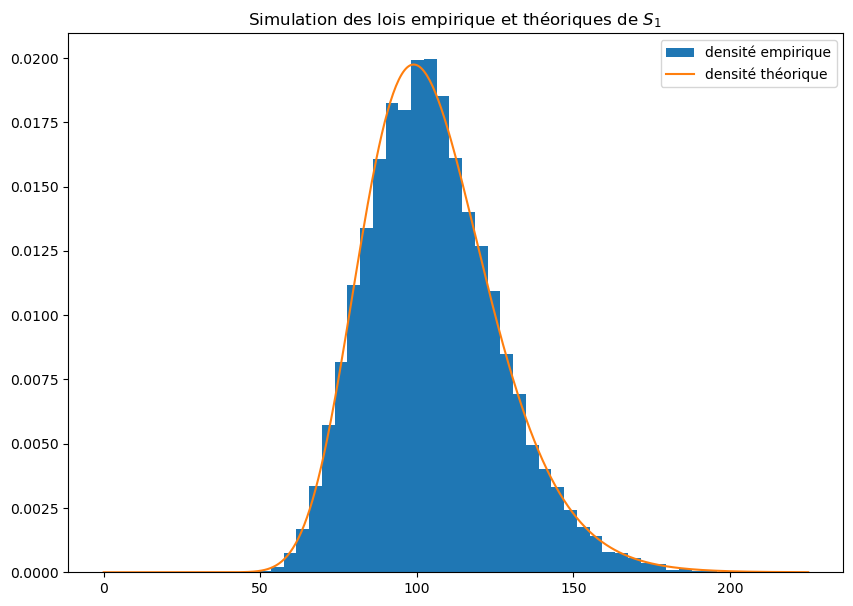

In [65]:
#constantes utilisées

r=0.05    #taux d’intérêt du marché
sigma=0.2 #volatilité de l’actif
x=100     #prix de l’actif à l’instant initial t = 0
n=10000   #nombre de réalisations (indépendantes)
t=1

nb_bins= 2 * int(n**(1./3.))
plt.figure(figsize=(10,7))

### Distribution empirique :

#simulation de B1 qui suit une loi N(0,1):
B1=np.random.normal(0,1,n)

#simulation de S1 à partir de B1 :
S1 = x * np.exp((r - 0.5 * sigma**2) * t + sigma * B1)

#Affichage de la simulation de S1 en fonction du temps :
plt.hist(S1, bins=nb_bins, density=True,label="densité empirique")

### Distribution théorique : 

#constantes pertinentes à définir :
mu = np.log(x) + (r-(sigma**2)/2)*t #espérence de S1 d'après la question T1
sigma_S1= sigma*np.sqrt(t) #écart type de S1 d'après la question T1

#densité de S1 :

def f(y):
    return (1/(y*np.sqrt(2*np.pi)*sigma_S1))*np.exp(-((np.log(y)-mu)**2)/(2*sigma_S1**2))

#Affichage du modèle theorique : 

X = np.linspace(0.01,225.0, 500) # on discrétise l'intervalle [0,225] en 500 points
    
fX = f(X) # puis on calcul f sur ces valeurs

plt.plot(X, fX, label="densité théorique")

#Legendes et axes : 
plt.title("Simulation des lois empirique et théoriques de $S_1$ ")

# on choisit une figure pas trop petite
plt.legend(loc="best")
plt.show()

### **Question S2)**

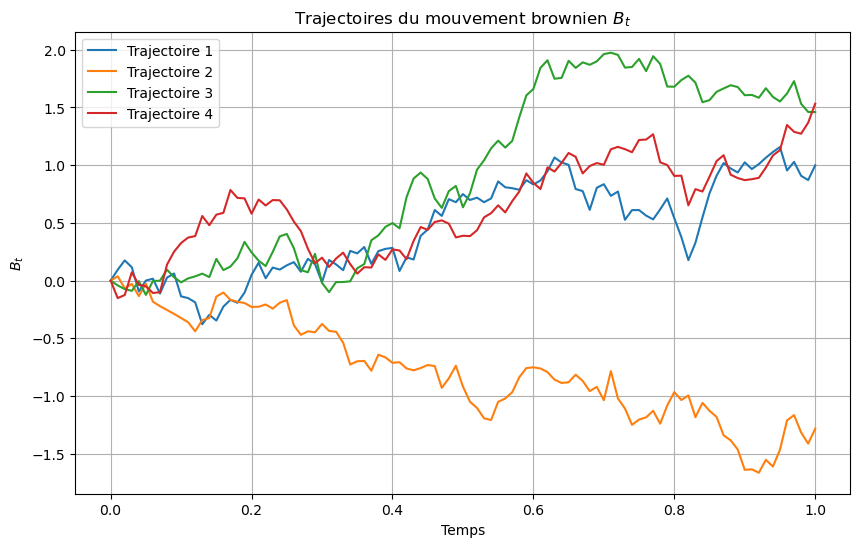

In [77]:
nb_trajectoires = 4 #nombre de trajectoires 
m = 100 # nombre de "pas" temporels
t = [i/m for i in range(m+1)] # grille de temps 
B=np.zeros((nb_trajectoires,m+1)) 
S=np.zeros((nb_trajectoires,m+1))                                           

#Bo = 0 donc on commence à B1 et on remarque que :
#B_t(i+1)= B_t(i) + ( B_t(i+1) - B_t(i) ) 
#et B_t(i+1) - B_t(i) suit une loi Normale centrée, de variance 1/m 
                            # et est donc indépendante de B_t(i)

for j in range (nb_trajectoires):
    S[j,0]=x
    for i in range(1,m+1):
        B[j,i]=B[j,i-1]+np.random.normal(0,1/np.sqrt(m))
        S[j,i]=x*np.exp((r-(sigma**2)/2)*t[i]+sigma*B[j,i])

# Trajectoires de B_t

plt.figure(figsize=(10, 6))
for j in range(nb_trajectoires):
    plt.plot(t, B[j, :], label=f'Trajectoire {j+1}')
    
plt.title('Trajectoires du mouvement brownien $B_t$')
plt.xlabel('Temps')
plt.ylabel('$B_t$')
plt.legend()
plt.grid(True)
plt.show()

**Analyse des résultats :** Les mouvements browniens semblent totalement décorrélés et aléatoires, il n'y a pas de tendance particulière qui apparait à priori. Cela semble cohérent et en accord avec les attentes du modèle théorique. 

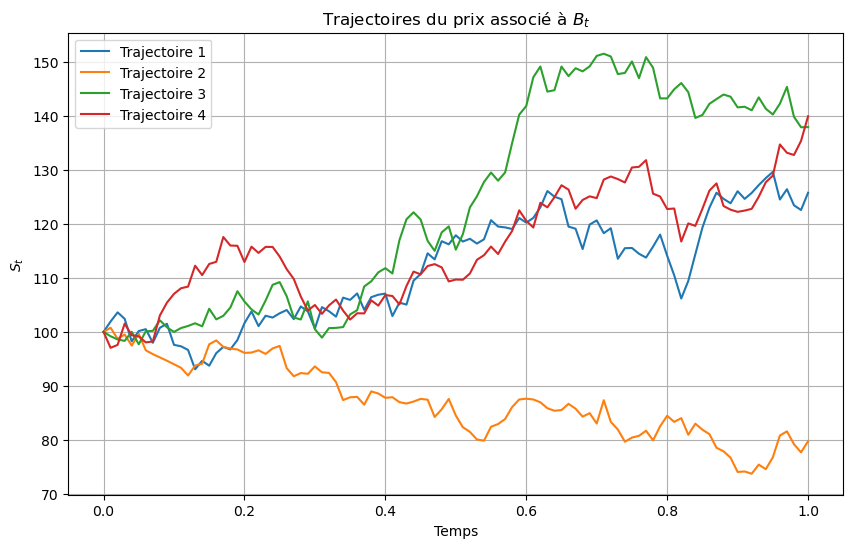

In [78]:
# Trajectoires du prix S_t

plt.figure(figsize=(10, 6))

for j in range(nb_trajectoires):
    plt.plot(t, S[j, :], label=f'Trajectoire {j+1}')
    
plt.title('Trajectoires du prix associé à $B_t$')
plt.xlabel('Temps')
plt.ylabel('$S_t$')
plt.legend()
plt.grid(True)
plt.show()

**Analyse des résultats :** L'évolution des trajectoires semble aléatoire, mais nous pouvons remarquer que, "globalement", le prix a beaucoup plus tendance à augmenter qu'à diminuer. 

Cela nous conforte dans le fait qu'il est intéréssant d'acheter des options puisque si le prix augmente, alors l'acheteur effectue un bénéfice en exerçant son option.

Il est important de noter que le prix peut varier significativement selon la trajectoire aléatoire du mouvement brownien. Ce comportement semble plutôt bien modéliser la volatilité des modèles financiers réels.

Améliorations possibles :

- Pour une analyse plus complète, on pourrait comparer ces trajectoires simulées à des données réelles pour voir si elles capturent bien les dynamiques du marché.

- Augmenter le nombre de trajectoires pour obtenir une vision plus large de la distribution et l'évoluton des prix.

## 2 _ Évaluation d'une option d'achat 

### **Question T2)** 

Supposons que $ X \sim \mathcal{N}(\mu,\sigma^2)$, calculons alors : 

$
\mathbb{E}[(\exp(X)-K)^+]= \mathbb{E}[(\exp(X)-K)\mathbf{1}_{\{\exp(X) > K\}}]
$

$
\mathbb{E}[(\exp(X)-K)^+]= \mathbb{E}[\exp(X)\mathbf{1}_{\{\exp(X) > K\}} - K\mathbf{1}_{\{\exp(X) > K\}}]
$

Et la fonction $\exp(x)$ est bijective et strictement croissante sur $\mathbb{R}$ de bijection réciproque $\log(x)$ donc :

$
\mathbb{E}[(\exp(X)-K)^+]= \mathbb{E}[\exp(X)\mathbf{1}_{\{X > \log(K)\}}] - K\mathbb{E}[\mathbf{1}_{\{X > \log(K)\}}]
$

### **Concernant le premier terme : $\mathbb{E}[\exp(X)\mathbf{1}_{\{X > \log(K)\}}]$ :**

Réécrivons cette espérence avec une intégrale :

$$
\mathbb{E}[\exp(X)\mathbf{1}_{\{X > \log(K)\}}]= \int_{\log(K)}^{+\infty}\frac{e^x}{\sqrt{2\pi\sigma^2}}{\exp\left(- \frac{(x-\mu)^2}{2\sigma^2} \right)dx}
$$

Soit 

$$
\mathbb{E}[\exp(X)\mathbf{1}_{\{X > \log(K)\}}]= \int_{\log(K)}^{+\infty}\frac{1}{\sqrt{2\pi\sigma^2}}{\exp\left(x- \frac{(x-\mu)^2}{2\sigma^2} \right)dx}
$$

Développons l'exposant de l'exponentielle : 

$$ 
x- \frac{(x-\mu)^2}{2\sigma^2} = \frac {2x\sigma^2 - x^2 + 2x\mu -\mu^2}{2\sigma^2}
$$


$$
x - \frac{(x-\mu)^2}{2\sigma^2} = - \frac {x^2 - 2x(\sigma^2 +\mu) +\mu^2}{2\sigma^2}
$$

$$
x - \frac{(x-\mu)^2}{2\sigma^2} = - \frac {x^2 - 2x(\sigma^2+\mu) + (\sigma^2+\mu)^2 - (\sigma^2+\mu)^2 +\mu^2}{2\sigma^2}
$$

$$
x - \frac{(x-\mu)^2}{2\sigma^2} = - \frac {x^2 - 2x(\sigma^2+\mu) + (\sigma^2+\mu)^2}{2\sigma^2} + \frac{ (\sigma^2+\mu)^2 -\mu^2}{2\sigma^2}
$$

$$
x - \frac{(x-\mu)^2}{2\sigma^2} = - \frac {(x - (\sigma^2+\mu))^2}{2\sigma^2} + \mu + \frac{\sigma^2}{2}
$$

Ainsi, en revenant à l'intégrale $I$ et en sortant le facteur exponentiel independant de x : 

$$
I = {e^{\mu + \frac{\sigma^2}{2}}}\int_{\log(K)}^{+\infty}\frac{1}{\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(x - (\sigma^2+\mu))^2}{2\sigma^2} \right)dx}
$$

Reconnaissons que cette intégrale est la fonction de répartition de la normale standard déplacée et mise à l'échelle. Soit $Z \sim \mathcal{N}(0,1)$

Alors : $ I = {e^{\mu + \frac{\sigma^2}{2}}} \mathbb{P}(Z > \frac{\log(K)-\mu\ - \sigma^2}{\sigma}) $

Or la densité d'une loi normale centrée réduite est symétrique donc pour tout x, on a $ \mathbb{P}(Z>x) = \mathbb{P}(Z<-x)$, ainsi : 

$ I = {e^{\mu + \frac{\sigma^2}{2}}} \mathbb{P}(Z < \frac{-\log(K)+\mu + \sigma^2}{\sigma} )$

$ I = {e^{\mu + \frac{\sigma^2}{2}}} \Phi\left(\frac{-\log(K)+\mu + \sigma^2}{\sigma}\right) $

D'où : $\mathbb{E}[\exp(X)\mathbf{1}_{\{X > \log(K)\}}]= {e^{\mu + \frac{\sigma^2}{2}}}\int_{\log(K)}^{+\infty}\frac{1}{\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(x - (\sigma^2+\mu))^2}{2\sigma^2} \right)dx}$

### **D'autre part, pour le second terme : $- K\mathbb{E}[\mathbf{1}_{\{X > \log(K)\}}]$**

Or $X>\log(K) \Leftrightarrow \frac{X-\mu}{\sigma}>\frac{\log(K)-\mu}{\sigma}$ et $H = \frac{X-\mu}{\sigma} \sim \mathcal{N}(0,1)$. Ainsi, la densité de H est symétrique donc on peut écrire :
$ \mathbb{P}(H>h) = \mathbb{P}(H<-h)$ et cela pour tout h donc :

$ \mathbb{P}(\frac{X-\mu}{\sigma}>\frac{\log(K)-\mu}{\sigma}) = \mathbb{P}(\frac{X-\mu}{\sigma}<-\frac{\log(K)-\mu}{\sigma})$

soit : 

$ \mathbb{P}(\frac{X-\mu}{\sigma}>\frac{\log(K)-\mu}{\sigma}) = \mathbb{P}(\frac{X-\mu}{\sigma}<\frac{\mu-\log(K)}{\sigma})$

Ainsi, 

$
\mathbb{E}[\mathbf{1}_{\{X > \log(K)\}}]= \mathbb{E}[\mathbf{1}_{{\frac{X-\mu}{\sigma}<\frac{\mu-\log(K)}{\sigma}}}]
$

$
\mathbb{E}[\mathbf{1}_{\{X > \log(K)\}}]= \mathbb{P}\left({\frac{X-\mu}{\sigma}<\frac{\mu-\log(K)}{\sigma}}\right)
$

Et comme $\frac{X-\mu}{\sigma} \sim \mathcal{N}(0,1)$ et $\Phi$ est la fonction de répartition de $\mathcal{N}(0,1)$, on obtient finalement : 

$\mathbb{P}({\frac{X-\mu}{\sigma}<\frac{\mu-\log(K)}{\sigma}})= \Phi\left(\frac{\mu-\log(K)}{\sigma}\right)$

D'où $- K\mathbb{E}[\mathbf{1}_{\{X > \log(K)\}}]= -K\Phi\left(\frac{\mu-\log(K)}{\sigma}\right)$

### Finalement, on obtient bien : 

$\mathbb{E}[(\exp(X)-K)^+]={e^{\mu+\frac{\sigma^2}{2}}}\Phi\left(\frac{\mu+\sigma^2-\log(K)}{\sigma}\right)-K\Phi\left(\frac{\mu-\log(K)}{\sigma}\right)$

### Question T3)

Réexprimons C grâce aux calculs précédents : 

$C = \mathbb{E}[{e^{-rT}}{(S_T - K)}^{+}]$
$C = {e^{-rT}}\mathbb{E}[{(S_T - K)}^{+}]$

De plus, on sait que $S_T = \exp\left(\log(x)+\left(r-\frac{\sigma^2}{2}\right)T + \sigma B_T \right)$ on pose donc $ X = \log(x)+\left(r-\frac{\sigma^2}{2}\right)T + \sigma B_T$. Alors $ X \sim \mathcal{N}(\log(x)+\left(r-\frac{\sigma^2}{2}\right)T, \sigma^2T)$ et $S_T=\exp(X)$.

Posons $\mu = \log(x)+\left(r-\frac{\sigma^2}{2}\right)T$ et $\sigma_0^2 = T\sigma^2$ alors, d'après la question précédente : 

$ \mathbb{E}[{(S_T - K)}^{+}] = {e^{\mu+\frac{\sigma_0^2}{2}}}\Phi\left(\frac{\mu+\sigma_0^2-\log(K)}{\sigma_0}\right)-K\Phi\left(\frac{\mu-\log(K)}{\sigma_0}\right)$

Soit 

$C = {e^{-rT}}\left( {e^{\mu+\frac{\sigma_0^2}{2}}}\Phi\left(\frac{\mu+\sigma_0^2-\log(K)}{\sigma_0}\right)-K\Phi\left(\frac{\mu-\log(K)}{\sigma_0}\right) \right)$

$C = {e^{-rT}}\left( {e^{\log(x)+\left(r-\frac{T\sigma^2}{2}\right)T+\frac{T\sigma^2}{2}}}\Phi\left(\frac{\log(x)+\left(r-\frac{\sigma^2}{2}\right)T+T\sigma^2-\log(K)}{\sqrt{T\sigma^2}}\right)-K\Phi\left(\frac{\log(x)+\left(r-\frac{\sigma^2}{2}\right)T-\log(K)}{\sqrt{T\sigma^2}}\right) \right)$

$C = e^{\log(x)}\Phi(d_1)+Ke^{-rT}\Phi(d_2)$

### Ce qui nous donne enfin : $C = x\Phi(d_1)+Ke^{-rT}\Phi(d_2)$

Avec $ d_1 = \frac{\log(x)+\left(r-\frac{\sigma^2}{2}\right)T+T\sigma^2-\log(K)}{\sqrt{T\sigma^2}}$

**Soit $ d_1 = \frac{1}{\sigma \sqrt{T}} ({\log(\frac{x}{K})+\left(r+\frac{\sigma^2}{2}\right)T})$.**

Et $d_2 = \frac{\log(x)+\left(r-\frac{\sigma^2}{2}\right)T-\log(K)}{\sqrt{T\sigma^2}}$

Soit $d_2 = \frac{1}{\sigma \sqrt{T}} ({\log(\frac{x}{K})+\left(r-\frac{\sigma^2}{2}\right)T})$

**Soit $ d_2 = d_1 - \sigma \sqrt{T}$.**

### Question S3)

In [68]:
#constantes utiles 

K=100
T=1

#avec la formule de Black-Scholes : 

d1 = (1/(sigma*np.sqrt(T)))*(np.log(x/K)+(r+(sigma**2)/2)*T)
d2 = d1 - sigma*np.sqrt(T)

C_BS = x*sps.norm.cdf(d1) - K*np.exp(-r*T)*sps.norm.cdf(d2)

#Méthode de Monte-Carlo :

n=10000 # nombre de réalisations 
alpha = 0.05 # 1-alpha = 0.95 donc un intervalle de confiance au niveau 95%

B_T = np.random.normal(0,T,n)
S_T = x*np.exp((r-(sigma**2)/2)*T+sigma*B_T)
C_T = np.maximum(0,S_T - K)
C_MC = np.exp(-r*T)*np.mean(C_T)

# Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
intervalle_inf = C_MC - 1.96 * (np.std(C_T) / np.sqrt(n))
intervalle_sup = C_MC + 1.96 * (np.std(C_T) / np.sqrt(n))

print(f"Prix du call (Black-Scholes) : {C_BS:.2f}")
print(f"Prix du call (Monte Carlo) : {C_MC:.2f}")
print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.3f},{intervalle_sup:.3f}]")


Prix du call (Black-Scholes) : 10.45
Prix du call (Monte Carlo) : 10.45
Intervalle de confiance (Monte Carlo) :[10.142,10.749]


**Analyse des données et comparaison des deux résultats :**  Les deux résultats sont très proches, mais cela ne veut riend dire concrètement. En revanche, nous pouvons remqrquer que e prix obtenu par le modèle de Black-Scholes est toujours compris dans l'intervalle de confiance à 95% du résultat par la méthode de Monte-Carlo, ce qui nous conforte dans la véracité du modèle de Black-Scholes. 

## 3 _ Événements rares 

### Question S4)

In [69]:
#constantes utiles 

K=200 #seul changement par rapport au code de la cellule précédente 
T=1

#avec la formule de Black-Scholes : 

d1 = (1/(sigma*np.sqrt(T)))*(np.log(x/K)+(r+(sigma**2)/2)*T)
d2 = d1 - sigma*np.sqrt(T)

C_BS = x*sps.norm.cdf(d1) - K*np.exp(-r*T)*sps.norm.cdf(d2)

#Méthode de Monte-Carlo :

n=10000 # nombre de réalisations 
alpha = 0.05 # 1-alpha = 0.95 donc un intervalle de confiance au niveau 95%

B_T = np.random.normal(0,T,n)
S_T = x*np.exp((r-(sigma**2)/2)*T+sigma*B_T)
C_T = np.maximum(0,S_T - K)
C_MC = np.exp(-r*T)*np.mean(C_T)

# Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
intervalle_inf = C_MC - 1.96 * (np.std(C_T) / np.sqrt(n))
intervalle_sup = C_MC + 1.96 * (np.std(C_T) / np.sqrt(n))

print(f"Prix du call (Black-Scholes) : {C_BS:.2f}")
print(f"Prix du call (Monte Carlo) : {C_MC:.2f}")
print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.3f},{intervalle_sup:.3f}]")



Prix du call (Black-Scholes) : 0.00
Prix du call (Monte Carlo) : 0.00
Intervalle de confiance (Monte Carlo) :[-0.001,0.005]


**Discussion de la qualité du résultat obtenu par la méthode de Monte-Carlo avec K=200** : 

On observe que l'intervalle de confiance à 95% pour le prix du call contient des valeurs très proches de zéro, ce qui est cohérent avec le fait que le prix d'exercice $K=200$ est plus élevé que le prix initial $x=100$. Par conséquent, la probabilité que $S_T$ dépasse $K$ est très faible, ce qui explique le prix très bas, voire quasiment nul, du call.

De plus, la présence de bornes inférieures proches de zéro voire négatives dans l'intervalle de confiance souligne une limitation importante de la méthode de Monte Carlo dans ce contexte. Pour remédier à cette incohérence, nous proposons d'augmenter le nombre de simulations $n=10000$ qui n'est peut être pas suffisant pour une estimation précise lorsque le prix de l'option est très faible relativement à $K$. 

Pour améliorer la précision, essayons d'augmenter considérablement le nombre de simulations :

In [70]:
#constantes utiles 

K=200 #seul changement par rapport au code de la cellule précédente 
T=1

#avec la formule de Black-Scholes : 

d1 = (1/(sigma*np.sqrt(T)))*(np.log(x/K)+(r+(sigma**2)/2)*T)
d2 = d1 - sigma*np.sqrt(T)

C_BS = x*sps.norm.cdf(d1) - K*np.exp(-r*T)*sps.norm.cdf(d2)

#Méthode de Monte-Carlo :

n=1000000 # nombre de réalisations 
alpha = 0.05 # 1-alpha = 0.95 donc un intervalle de confiance au niveau 95%

B_T = np.random.normal(0,T,n)
S_T = x*np.exp((r-(sigma**2)/2)*T+sigma*B_T)
C_T = np.maximum(0,S_T - K)
C_MC = np.exp(-r*T)*np.mean(C_T)

# Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
intervalle_inf = C_MC - 1.96 * (np.std(C_T) / np.sqrt(n))
intervalle_sup = C_MC + 1.96 * (np.std(C_T) / np.sqrt(n))

print(f"Prix du call (Black-Scholes) : {C_BS:.2f}")
print(f"Prix du call (Monte Carlo) : {C_MC:.2f}")
print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.3f},{intervalle_sup:.3f}]")


Prix du call (Black-Scholes) : 0.00
Prix du call (Monte Carlo) : 0.00
Intervalle de confiance (Monte Carlo) :[0.004,0.005]


**Conclusion** : L'augmentation du nombre de simulations semble avoir résolu le problème de borne inférieure négative. Cela est en accord avec le fait que la précision du modèle de Monte-Carlo augmente avec le nombre de simulations. 

### Question T4)

Par définition de l'espérance
$$
\mathbb{E}[g(X)]= \int_{\mathbb{R}} g(x) \frac{1}{\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{x^2}{2\sigma^2} \right)dx}
$$
Par le changement de variable $x' = x + h$ on obtient
$$
\mathbb{E}[g(X)]= \int_{\mathbb{R}} g(x+h) \frac{1}{\sqrt{2\pi\sigma^2}}{\exp\left(-\frac{(x+h)^2}{2\sigma^2} \right)dx}
$$
soit encore
$$
\mathbb{E}[g(X)]= \int_{\mathbb{R}} g(x+h) \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{2hx + h^2}{2\sigma^2} \right){\exp\left(-\frac{x^2}{2\sigma^2} \right)dx}
$$
d'où 
$$
\mathbb{E}[g(X)] = \mathbb{E}\left[\exp\left(-\frac{2hX + h^2}{2\sigma^2} \right)g(X + h)\right]
$$

### Question T5)

$$C = \mathbb{E}[{e^{-rT}}{(S_T - K)}^{+}] = \mathbb{E}\left[{e^{-rT}}{\left(x\exp\left(\left(r-\frac{\sigma^2}{2}\right)t + \sigma B_T \right) - K\right)}^{+}\right] $$
avec $B_T \sim \mathcal{N}(0,T)$

On utilise la formule précédente avec $g : y \mapsto {e^{-rT}}{\left(x\exp\left(\left(r-\frac{\sigma^2}{2}\right)T + \sigma y \right) - K\right)}^{+}$ et $h' = hT$.

On obtient 

$$C = \mathbb{E}(g(B_T)) = \mathbb{E}\left[\exp\left(-\frac{2hTX + (hT)^2}{2T} \right)g(B_T + hT)\right]$$

et en explicitant $g$

$$C = \mathbb{E}(g(B_T)) = \mathbb{E}\left[\exp\left(-hB_T -\frac{h^2T}{2} \right){e^{-rT}}{\left(x\exp\left(\left(r-\frac{\sigma^2}{2}\right)T + \sigma (B_T + hT) \right) - K\right)}^{+}\right] $$

ce qui donne 

$$C = \mathbb{E}(g(B_T)) = \mathbb{E}\left[\exp\left(-hB_T -\frac{h^2T}{2} \right){e^{-rT}}{\left(x\exp\left(\left(r + \sigma h -\frac{\sigma^2}{2}\right)T + \sigma B_T \right) - K\right)}^{+}\right] $$

On remarque que cette expression diffère du résultat demandé d'un facteur $e^{-rT}$.

### Question S5)

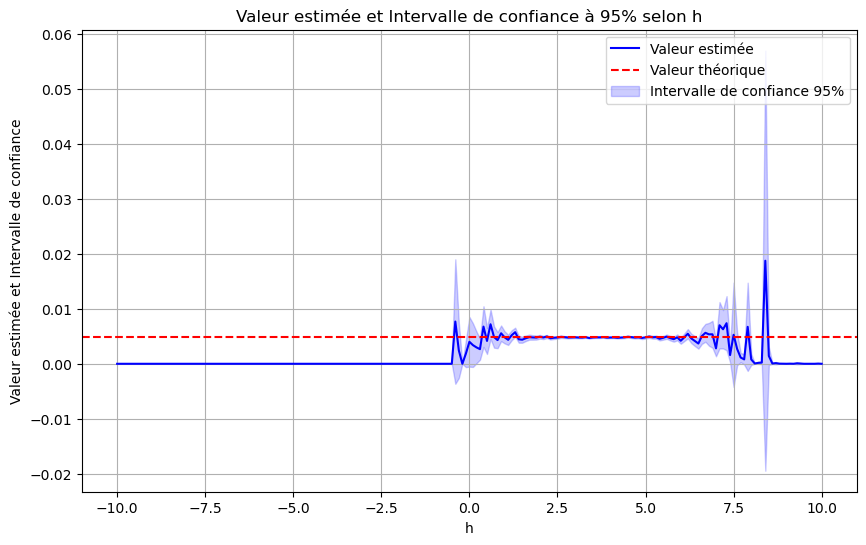

In [71]:
#constantes utiles 

K=200
T=1


#avec la formule de Black-Scholes : 

d1 = (1/(sigma*np.sqrt(T)))*(np.log(x/K)+(r+(sigma**2)/2)*T)
d2 = d1 - sigma*np.sqrt(T)

C_BS = x*sps.norm.cdf(d1) - K*np.exp(-r*T)*sps.norm.cdf(d2)

#Méthode de Monte-Carlo :

n=10000 # nombre de réalisations 
alpha = 0.05 # 1-alpha = 0.95 donc un intervalle de confiance au niveau 95%


#print(f"Prix du call (Black-Scholes) : {C_BS:.5f}")
#print(f"Prix du call (Monte Carlo) : {C_MC:.5f}")
#print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.5f},{intervalle_sup:.5f}]")

def monte_carlo_simulation(h):
    B_T = np.random.normal(0,T,n)
    S_T = x*np.exp((r+sigma*h-(sigma**2)/2)*T+sigma*B_T)
    M_T = np.exp(-h*B_T - ((h**2)/2)*T)
    C_T = np.maximum(0,S_T - K)
    C_MC = np.exp(-r*T)*np.mean(M_T*C_T)

    # Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
    intervalle_inf = C_MC - 1.96 * (np.std(M_T*C_T) / np.sqrt(n))
    intervalle_sup = C_MC + 1.96 * (np.std(M_T*C_T) / np.sqrt(n))
    
    return C_MC, intervalle_inf, intervalle_sup


# Définir la plage de h
h_values = np.arange(-10, 10.1, 0.1)

# Initialiser des listes pour stocker les résultats
valeurs_estimees = []
intervalle_confiance_inf = []
intervalle_confiance_sup = []

# Calculer les résultats pour chaque valeur de h
for h in h_values:
    valeur, ic_inf, ic_sup = monte_carlo_simulation(h)
    valeurs_estimees.append(valeur)
    intervalle_confiance_inf.append(ic_inf)
    intervalle_confiance_sup.append(ic_sup)

# Convertir les listes en arrays numpy pour faciliter le tracé
valeurs_estimees = np.array(valeurs_estimees)
intervalle_confiance_inf = np.array(intervalle_confiance_inf)
intervalle_confiance_sup = np.array(intervalle_confiance_sup)

valeur_theorique = C_BS

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(h_values, valeurs_estimees, label='Valeur estimée', color='blue')
plt.axhline(y=valeur_theorique, color='red', linestyle='--', label='Valeur théorique')
plt.fill_between(h_values, intervalle_confiance_inf, intervalle_confiance_sup, color='blue', alpha=0.2, label='Intervalle de confiance 95%')
plt.xlabel('h')
plt.ylabel('Valeur estimée et Intervalle de confiance')
plt.title('Valeur estimée et Intervalle de confiance à 95% selon h')
plt.legend()
plt.grid(True)
plt.show()

**Analyse du résultat** : On fait varier $h$ entre $-10$ et $10$ par pas de $0,1$. Le graphique ci-dessus nous indique qu'on peut recentrer entre $-2,5$ et $5$ pour trouver la valeur de $h$ optimale. La méthode de la question S4 correspondant à la valeur $h = 0$, on voit que la méthode de Monte Carlo est dans ce cas très insatisfaisante.  

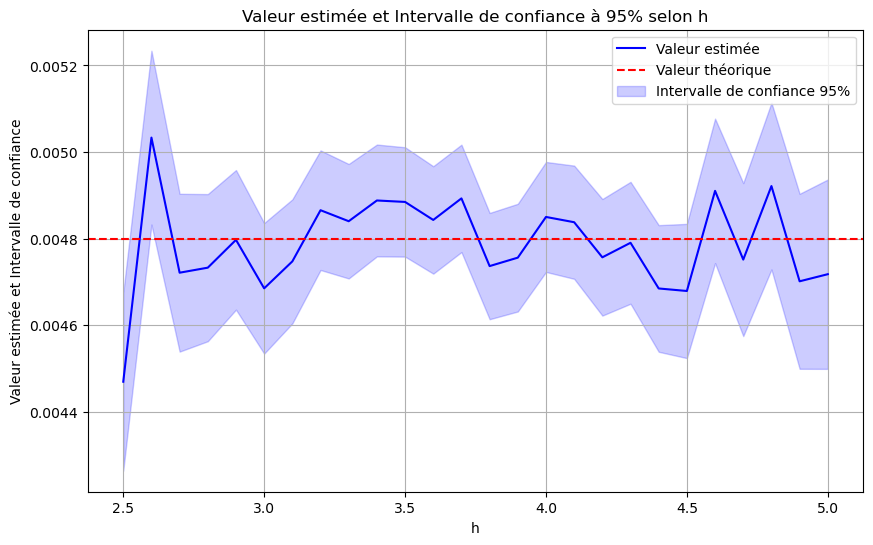

La valeur de h pour laquelle l'intervalle de confiance est le plus petit est h = 3.6
La largeur minimale de l'intervalle de confiance est 0.00025


In [72]:
#constantes utiles 

K=200 #seul changement par rapport au code de la cellule précédente 
T=1


#avec la formule de Black-Scholes : 

d1 = (1/(sigma*np.sqrt(T)))*(np.log(x/K)+(r+(sigma**2)/2)*T)
d2 = d1 - sigma*np.sqrt(T)

C_BS = x*sps.norm.cdf(d1) - K*np.exp(-r*T)*sps.norm.cdf(d2)

#Méthode de Monte-Carlo :

n=10000 # nombre de réalisations 
alpha = 0.05 # 1-alpha = 0.95 donc un intervalle de confiance au niveau 95%


#print(f"Prix du call (Black-Scholes) : {C_BS:.5f}")
#print(f"Prix du call (Monte Carlo) : {C_MC:.5f}")
#print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.5f},{intervalle_sup:.5f}]")

def monte_carlo_simulation(h):
    B_T = np.random.normal(0,T,n)
    S_T = x*np.exp((r+sigma*h-(sigma**2)/2)*T+sigma*B_T)
    M_T = np.exp(-h*B_T - ((h**2)/2)*T)
    C_T = np.maximum(0,S_T - K)
    C_MC = np.exp(-r*T)*np.mean(M_T*C_T)

    # Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
    intervalle_inf = C_MC - 1.96 * (np.std(M_T*C_T) / np.sqrt(n))
    intervalle_sup = C_MC + 1.96 * (np.std(M_T*C_T) / np.sqrt(n))
    
    return C_MC, intervalle_inf, intervalle_sup


# Définir la plage de h
h_values = np.arange(2.5, 5.1, 0.1)

# Initialiser des listes pour stocker les résultats
valeurs_estimees = []
intervalle_confiance_inf = []
intervalle_confiance_sup = []

# Calculer les résultats pour chaque valeur de h
for h in h_values:
    valeur, ic_inf, ic_sup = monte_carlo_simulation(h)
    valeurs_estimees.append(valeur)
    intervalle_confiance_inf.append(ic_inf)
    intervalle_confiance_sup.append(ic_sup)

# Convertir les listes en arrays numpy pour faciliter le tracé
valeurs_estimees = np.array(valeurs_estimees)
intervalle_confiance_inf = np.array(intervalle_confiance_inf)
intervalle_confiance_sup = np.array(intervalle_confiance_sup)

valeur_theorique = C_BS 

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(h_values, valeurs_estimees, label='Valeur estimée', color='blue')
plt.axhline(y=valeur_theorique, color='red', linestyle='--', label='Valeur théorique')
plt.fill_between(h_values, intervalle_confiance_inf, intervalle_confiance_sup, color='blue', alpha=0.2, label='Intervalle de confiance 95%')
plt.xlabel('h')
plt.ylabel('Valeur estimée et Intervalle de confiance')
plt.title('Valeur estimée et Intervalle de confiance à 95% selon h')
plt.legend()
plt.grid(True)
plt.show()

largeur_intervalle_confiance = intervalle_confiance_sup - intervalle_confiance_inf
indice_min_largeur = np.argmin(largeur_intervalle_confiance)
h_min_largeur_sig = round(h_min_largeur, 3)
largeur_min_intervalle_confiance_sig = round(largeur_min_intervalle_confiance, 5)
print(f"La valeur de h pour laquelle l'intervalle de confiance est le plus petit est h = {h_min_largeur_sig}")
print(f"La largeur minimale de l'intervalle de confiance est {largeur_min_intervalle_confiance_sig}")

**Analyse du résultat** : Cette fois, on fait varier $h$ entre $2,5$ et $5$ par pas de $0,1$. On observe que le meilleur intervalle de confiance semble être obtenu pour $h=3.6$. L'estimation est de bien meilleure qualité que celle obtenu à la question S4.

## 4 _ Évaluation d'une option asiatique

### Question S6)

In [73]:
#constantes utiles 

K=100 #seul changement par rapport au code de la cellule précédente 
T=1
n=10000 # nombre de réalisations 
                                        
m = 10 # nombre de "pas" temporels
t = [i/m for i in range(m+1)] # grille de temps 
B=np.zeros((n,m+1)) 
S=np.zeros((n,m+1))   

for j in range (n):
    S[j,0]=x
    for i in range(1,m+1):
        B[j,i]=B[j,i-1]+np.random.normal(0,1/np.sqrt(m))
        S[j,i]=x*np.exp((r-(sigma**2)/2)*t[i]+sigma*B[j,i]) 
        
sumS=np.zeros((n, 1))
for j in range(n):
    for i in range(1, m+1):
        sumS[j][0] += S[j][i]

#Méthode de Monte-Carlo :
C_T = np.exp(-r*T)*np.maximum(0,sumS/m - K)
C_MC = np.mean(C_T)

# Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
intervalle_inf = C_MC - 1.96 * (np.std(C_T) / np.sqrt(n))
intervalle_sup = C_MC + 1.96 * (np.std(C_T) / np.sqrt(n))

print(f"Prix du call asiatique (Monte Carlo) : {C_MC:.2f}")
print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.3f},{intervalle_sup:.3f}]")

Prix du call asiatique (Monte Carlo) : 6.23
Intervalle de confiance (Monte Carlo) :[6.066,6.399]


On remarque que le prix de call d'une action asiatique est inférieur au prix de call d'une action européenne à paramètres égaux.

### Question T6)

Par définition
$$S_T = \exp\left(\log(x)+\left(r-\frac{\sigma^2}{2}\right)T + \sigma B_T \right)$$
donc 
$$\frac{1}{m} \sum^{m}_{i = 1} \log S_{t_i} = \log x + \frac{1}{m}\left(r-\frac{\sigma^2}{2}\right) \sum^{m}_{i = 1} \frac{iT}{m} + \frac{\sigma}{m} \sum^{m}_{i = 1} B_{t_i} $$
ou encore 
$$\frac{1}{m} \sum^{m}_{i = 1} \log S_{t_i} = \log x + \left(r-\frac{\sigma^2}{2}\right) \frac{(m+1)T}{2m} + \frac{\sigma}{m} \sum^{m}_{i = 1} B_{t_i} $$
Par téléscopage, on a 
$$ \sum^{m}_{i = 1} B_{t_i} = \sum^{m}_{i = 1} (m + 1 - i) (B_{t_i} - B_{t_{i-1}})$$
Par indépendance des $B_{t_i} - B_{t_{i-1}}$ de variance $T/m$, on obtient
$$ \mathbb{V} \left( \frac{\sigma}{m} \sum^{m}_{i = 1} B_{t_i} \right) = \frac{\sigma^2}{m^2} \sum^{m}_{i = 1} (m + 1 - i)^2 \frac{T}{m} = \frac{\sigma^2 T }{m^3} \frac{m(m+1)(2m+1)}{6} = \frac{(m+1)(2m+1)}{6m^2}\sigma^2 T $$

On a donc $\frac{1}{m} \sum^{m}_{i = 1} \log S_{t_i}$ qui suite une loi normale de moyenne $\log x + \left(r-\frac{\sigma^2}{2}\right) \frac{(m+1)T}{2m}$ et de variance $\frac{(m+1)(2m+1)}{6m^2}\sigma^2 T $.

Pour calculer $\tilde{A}$, on utlise la formule obtenue à la question T2 avec la moyenne et la variance obtenue ci-dessus. 

$$\tilde{A} = {e^{-rT}}\mathbb{E}\left[\left(\exp \left(\frac{1}{m} \sum^{m}_{i = 1} \log S_{t_i}\right)-K\right)^+\right]$$

soit 

$$\tilde{A} ={e^{-rT}}{e^{\log x + \left(r-\frac{\sigma^2}{2}\right) \frac{(m+1)T}{2m}+\frac{(m+1)(2m+1)}{12m^2}\sigma^2 T}}\Phi\left(\frac{\log x + \left(r-\frac{\sigma^2}{2}\right) \frac{(m+1)T}{2m}+\frac{(m+1)(2m+1)}{6m^2}\sigma^2 T-\log(K)}{\sqrt{\frac{(m+1)(2m+1)}{6m^2}\sigma^2 T}}\right)-K\Phi\left(\frac{\log x + \left(r-\frac{\sigma^2}{2}\right) \frac{(m+1)T}{2m}-\log(K)}{\sqrt{\frac{(m+1)(2m+1)}{6m^2}\sigma^2 T}}\right)$$

### Question S7)

In [74]:
#paramètres utiles
K = 100
T = 1
m = 10
r=0.05    #taux d’intérêt du marché
sigma=0.2 #volatilité de l’actif
x=100     #prix de l’actif à l’instant initial t = 0

moyenne = np.log(x) + (r - (sigma**2)/2)*(m+1)*T/(2*m)
variance = ((2*m + 1)*(m + 1)*(sigma**2)*T)/(6*m**2)

e1 = (moyenne + variance - np.log(K))/np.sqrt(variance)
e2 = (moyenne - np.log(K))/np.sqrt(variance)

Atilde = np.exp(-r*T)*np.exp(moyenne + variance/2)*sps.norm.cdf(e1) - K*np.exp(-r*T)*sps.norm.cdf(e2)

print(f"Valeur de A tilde : {Atilde:.2f}")

Valeur de A tilde : 6.02


### Question S8)

In [76]:
#constantes utiles 

K=100 #seul changement par rapport au code de la cellule précédente 
T=1
n=10000 # nombre de réalisations 
m = 10

#calcul de A tilde (copie du code ci-dessus)
moyenne = np.log(x) + (r - (sigma**2)/2)*(m+1)*T/(2*m)
variance = ((2*m + 1)*(m + 1)*(sigma**2)*T)/(6*m**2)

e1 = (moyenne + variance - np.log(K))/np.sqrt(variance)
e2 = (moyenne - np.log(K))/np.sqrt(variance)

Atilde = np.exp(-r*T)*np.exp(moyenne + variance/2)*sps.norm.cdf(e1) - K*np.exp(-r*T)*sps.norm.cdf(e2)
#Méthode de Monte-Carlo :
                                        
m = 10 # nombre de "pas" temporels
t = [i/m for i in range(m+1)] # grille de temps 
B=np.zeros((n,m+1)) 
S=np.zeros((n,m+1))   

for j in range (n):
    S[j,0]=x
    for i in range(1,m+1):
        B[j,i]=B[j,i-1]+np.random.normal(0,1/np.sqrt(m))
        S[j,i]=x*np.exp((r-(sigma**2)/2)*t[i]+sigma*B[j,i]) 
        
sumS=np.zeros((n, 1))
prodS=np.ones((n, 1))
for j in range(n):
    for i in range(1, m+1):
        sumS[j] += (1/m)*S[j][i]
        prodS[j] *= S[j][i]**(1/m)


C_T = np.exp(-r*T)*np.maximum(0,sumS - K) - np.exp(-r*T)*np.maximum(0,prodS - K)
C_MC = np.mean(C_T)+Atilde

# Intervalle de confiance à 95% : expression démontrée dans le cours pour une gaussienne 
intervalle_inf = C_MC - 1.96 * (np.std(C_T) / np.sqrt(n))
intervalle_sup = C_MC + 1.96 * (np.std(C_T) / np.sqrt(n))

print(f"Prix du call (Monte Carlo) : {C_MC:.3f}")
print(f"Intervalle de confiance (Monte Carlo) :[{intervalle_inf:.3f},{intervalle_sup:.3f}]")

Prix du call (Monte Carlo) : 6.235
Intervalle de confiance (Monte Carlo) :[6.228,6.242]


**Analyse du résultat :** On retrouve le même résultat qu'à la question S6 mais avec un meilleur intervalle de confiance.